## Feature Engineering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('data/listings_cleaned.csv')
df.shape

(3583, 43)

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

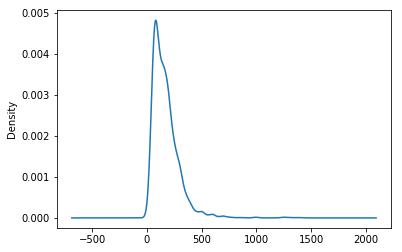

In [4]:
#distribution of target value
df['price'].plot.kde()

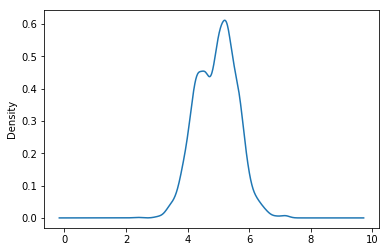

In [5]:
df['price_log']=np.log(df['price'])
df['price_log'].plot.kde()

#### Feature for Boston Residents

In [6]:
#create new column for if the host is based in Boston.
df.host_location.value_counts()

Boston, Massachusetts, United States              2420
US                                                 520
New York, New York, United States                  113
Montreal, Quebec, Canada                            59
Middlesex County, Massachusetts, United States      50
                                                  ... 
Providence, Rhode Island, United States              1
Buenos Aires, Argentina                              1
Norwich, Vermont, United States                      1
Berlin, Massachusetts, United States                 1
Smithfield, Rhode Island, United States              1
Name: host_location, Length: 176, dtype: int64

In [7]:
df['host_base_boston']= None
def is_boston(city):
    '''
        summary: Checks if user is based in Boston
        
        args:
            city : Residency city of user
        
        returns : 
            True is resident based in Boston
            False otherwise
    
    
    '''
    if city == 'Boston, Massachusetts, United States':
        return True
    else:
        return False


#### Creates new column based on if user is Boston based 

In [ ]:
df['host_base_boston'] = df['host_location'].apply(lambda x: is_boston(x))
df.drop(columns=['host_location'],inplace=True)

In [8]:
df['host_base_boston'].value_counts()

True     2420
False    1163
Name: host_base_boston, dtype: int64

#### Clean Host Verifications Column and Get one hot encoding for each different Verification category

In [9]:
df['host_verifications'] = df['host_verifications'].str.strip('[]').str.split('\s*,\s*')

df1 = (
    df['host_verifications'].explode()
    .str.get_dummies().sum(level=0).add_prefix('host_verifications_')
)

df1 = df.drop('host_verifications', 1).join(df1)
df=df1

####  Get one hot encoding for each different Amenities 

In [10]:
df['amenities'] = df['amenities'].str.strip('{}').str.split('\s*,\s*')

df1 = (
    df['amenities'].explode()
    .str.get_dummies().sum(level=0).add_prefix('amenities_')
)

df1 = df.drop('amenities', 1).join(df1)
df=df1

#### Get one hot encoding for Categorical Columns

In [11]:
cat_cols=['host_response_time','host_is_superhost','host_has_profile_pic',
          'host_identity_verified','neighbourhood_cleansed','bed_type','property_type','room_type','requires_license',
         'requires_license', 'instant_bookable',
          'cancellation_policy', 'require_guest_profile_picture',
          'require_guest_phone_verification']

In [12]:
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [13]:
df.to_csv('data/listings_featured.csv',index=False)

In [14]:
df.shape

(3583, 141)